In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, precision_score,recall_score,f1_score

In [2]:
df= pd.read_csv('fetal_health.csv')

In [3]:
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [4]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [5]:
df.shape

(2126, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

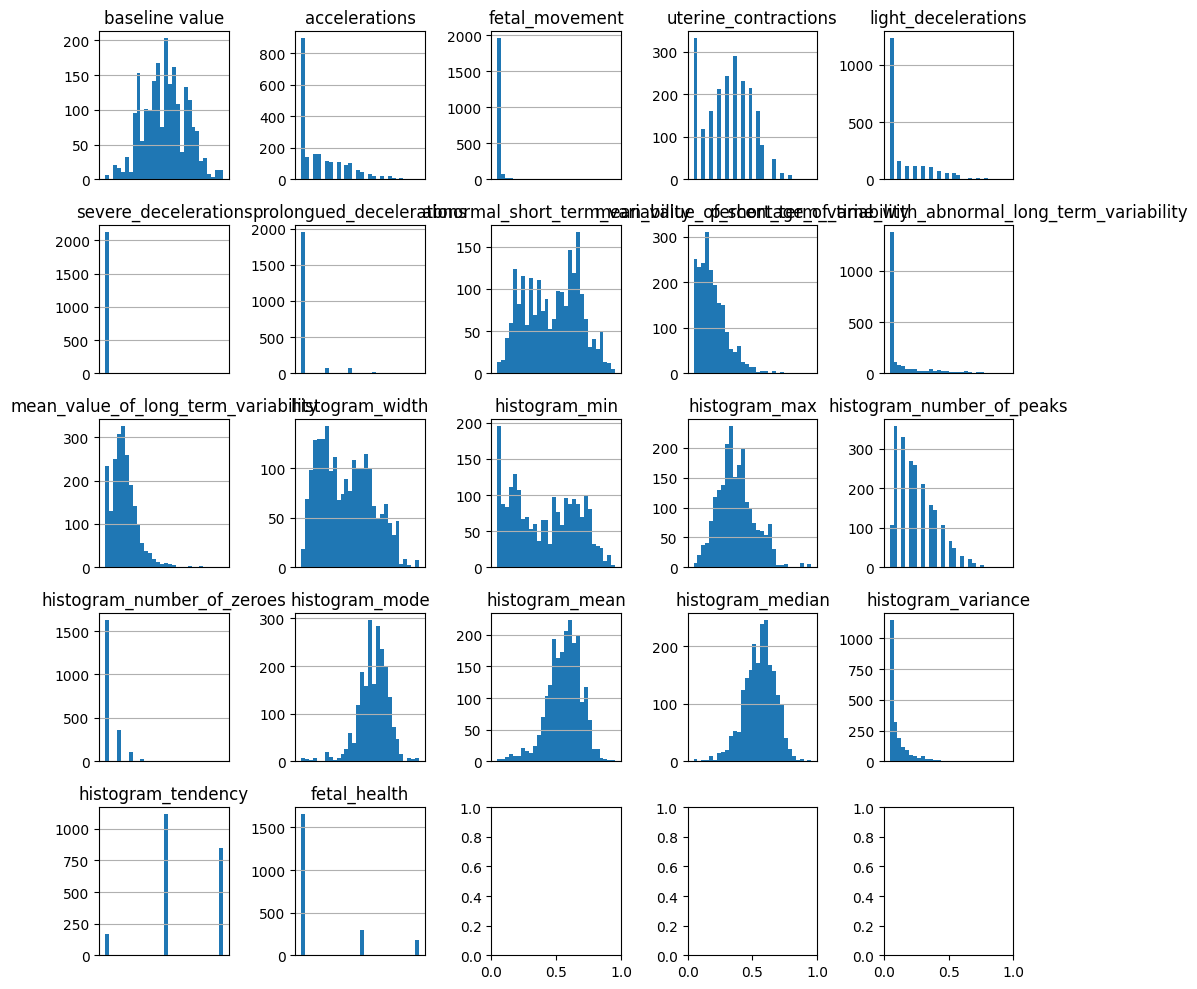

In [22]:
# Calculate the number of rows and columns based on the number of histograms
num_plots = 22
num_rows = int(np.ceil(np.sqrt(num_plots)))
num_cols = int(np.ceil(num_plots / num_rows))

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 10))

# Plot histograms on each subplot
for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    df[col].hist(bins=30, ax=ax)
    ax.set_title(col)
    ax.set_xticks([])  # Hide x-axis ticks for better visibility

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()

In [9]:
#y
df_target=df['fetal_health'] 
#x
df_feature=df.drop('fetal_health',axis=1)

In [10]:
df_target.head(10)

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
5    3.0
6    3.0
7    3.0
8    3.0
9    3.0
Name: fetal_health, dtype: float64

In [11]:
df_feature.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0


In [12]:
X_train, X_test,y_train,y_test=train_test_split(df_feature,df_target,test_size=0.25,random_state=20)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1594, 21), (532, 21), (1594,), (532,))

In [14]:
#### Create baseline model with Logistic Regression
from sklearn.linear_model import LogisticRegression

# performm scaling with Standard Scaler on the training set
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

# baseline model of Logistic Regression using default parameters
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict the testing set
y_test_pred1 = lr.predict(X_test)

In [15]:
# function to compute accuracy for binary class
def get_score(y_test, y_test_pred):
    accuracy1 = accuracy_score(y_test, y_test_pred)
    recall1 = recall_score(y_test, y_test_pred, average="weighted")
    precision1 = precision_score(y_test, y_test_pred, average="weighted")
    f1_score1 = 2 * (precision1 * recall1) / (precision1 + recall1)

    print("Accuracy    : ", accuracy1)
    print("Recall      : ", recall1)
    print("Precision   : ", precision1)
    print("F1 Score    : ", f1_score1)

print("********* Baseline Logistic Regression Results *********")
get_score(y_test=y_test, y_test_pred=y_test_pred1)

********* Baseline Logistic Regression Results *********
Accuracy    :  0.8721804511278195
Recall      :  0.8721804511278195
Precision   :  0.8650873876439933
F1 Score    :  0.8686194393073421


In [16]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.94       391
         2.0       0.71      0.58      0.64        91
         3.0       0.77      0.72      0.74        50

    accuracy                           0.87       532
   macro avg       0.80      0.75      0.77       532
weighted avg       0.87      0.87      0.87       532



In [17]:
#### Use another classifier approach to Random Forest to gain better accuary


# train a Decision Tree classifier on the training data
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# predict the test dataset
y_test_pred2 = classifier.predict(X_test)

print("********* Baseline Decision Tree Results *********")
get_score(y_test=y_test, y_test_pred=y_test_pred2)

********* Baseline Decision Tree Results *********
Accuracy    :  0.9097744360902256
Recall      :  0.9097744360902256
Precision   :  0.9075676641279017
F1 Score    :  0.9086697102835863


In [18]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       391
         2.0       0.81      0.73      0.77        91
         3.0       0.91      0.86      0.89        50

    accuracy                           0.91       532
   macro avg       0.89      0.85      0.87       532
weighted avg       0.91      0.91      0.91       532



In [19]:
#### Improve classifier accuracy with hyperparameter tuning


# apply parameters for GridSearch CV
# reference: https://www.kaggle.com/code/sagarjiyani/fetal-health-classification-96-f1-score
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,21).tolist()[0::2],
    'min_samples_split':np.arange(2,11).tolist()[0::2],
    'max_leaf_nodes':np.arange(3,26).tolist()[0::2]
}

CV_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=1)
CV_DT.fit(X_train, y_train)

# apply different parameters
dt = DecisionTreeClassifier(**CV_DT.best_params_)
dt.fit(X_train, y_train)

# predict the testing set
y_test_pred3 = dt.predict(X_test)

print("********* Tuned Decision Tree Results *********")
get_score(y_test=y_test, y_test_pred=y_test_pred3)

********* Tuned Decision Tree Results *********
Accuracy    :  0.9116541353383458
Recall      :  0.9116541353383458
Precision   :  0.9120874038838593
F1 Score    :  0.9118707181450291


In [20]:
print(classification_report(y_test, y_test_pred3))

              precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       391
         2.0       0.92      0.64      0.75        91
         3.0       0.90      0.88      0.89        50

    accuracy                           0.91       532
   macro avg       0.91      0.83      0.86       532
weighted avg       0.91      0.91      0.91       532



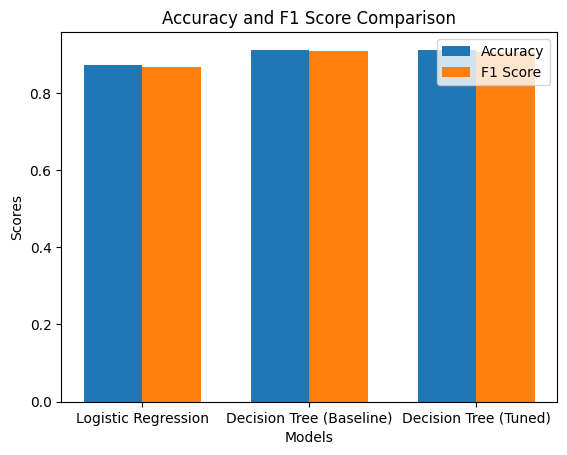

In [21]:
# Function to compute scores
def get_scores(y_test, y_test_pred):
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average="weighted")
    precision = precision_score(y_test, y_test_pred, average="weighted")
    f1 = f1_score(y_test, y_test_pred, average="weighted")

    return accuracy, recall, precision, f1

# Collect scores for each model
models = ['Logistic Regression', 'Decision Tree (Baseline)', 'Decision Tree (Tuned)']
accuracy_scores = []
f1_scores = []

for y_test_pred in [y_test_pred1, y_test_pred2, y_test_pred3]:
    accuracy, _, _, f1 = get_scores(y_test, y_test_pred)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Plotting the results
bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score Comparison')
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.show()